In [21]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy as sp 
import seaborn as sns
import xlsxwriter

import math
from math import exp, sqrt, log

%matplotlib inline

from scipy import stats

import pylab
import statistics 

import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson


import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

import xlsxwriter
#from statsmodels.tsa.ar_model import AR
#from statsmodels.tsa.stattools import grangercausalitytests
#from statsmodels.tsa.tsatools import (lagmat, add_trend)

import itertools

In [22]:
# Import of the Data retrieved via Bloomberg Excel Add-In
data = pd.read_excel("BLOOMBERG_2021_05_15_Data_Values_ND.xlsx", index_col=0, skiprows=1)
data.head()

,WTI_Crude_Oil,Natural_Gas,Soybean,Corn,Copper,Gold,Silver,US_Industrial_Production_YoY%_Change,US_Initial_Jobless_Claims_in_thousands,US_Employees_on_Nonfarm_Payrolls_Total_MoM,ISM_Manufacturing_PMI_SA,US_Consumer_Prices_2010_=_100_Not_Seasonally_adjusted,US_Budget_Balance_Annualized_$Bln,US_Budget_Balance_as_%_of_GDP,"Government_Debt_USD,_Billions","Money_Suppply_M2_USD,_Billions",3m_Interest_Rate_%,10-Yr_gov._Bond,S&P_500_TR_Index,EUR_USD
Dates,,,,,,,,,,,,,,,,,,,,
1990-12-31,28.44,1.950,559.750,231.75,116.85,396.2,4.247,-1.05,454,109166,40.8,61.4,-236.36,-3.92,3364.82,3291.6,7.630,8.067,367.63,1.3908
1991-01-31,21.54,1.380,566.625,244.25,106.40,365.8,3.851,-0.81,462,109055,39.2,61.7,-242.99,-3.92,3411.41,3266.9,7.060,8.007,383.64,1.4069
1991-02-28,19.16,1.373,575.625,241.25,114.70,369.0,3.729,-2.48,499,108734,39.4,61.8,-233.97,-3.92,3458.64,3290.0,6.880,8.033,411.08,1.3710
1991-03-29,19.63,1.405,574.750,252.75,106.20,357.1,3.868,-3.49,499,108574,40.7,61.9,-221.82,-3.86,3465.19,3320.0,6.375,8.061,421.03,1.2253
1991-04-30,20.96,1.375,576.500,246.50,105.90,357.7,3.969,-3.16,462,108364,42.8,62.0,-233.64,-3.86,3445.06,3313.8,6.060,8.013,422.03,1.2192


In [23]:
# Check if datetime index correctly set and all 361 rows include no NaN values 
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 1990-12-31 to 2020-12-31
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   WTI_Crude_Oil                                          361 non-null    float64
 1   Natural_Gas                                            361 non-null    float64
 2   Soybean                                                361 non-null    float64
 3   Corn                                                   361 non-null    float64
 4   Copper                                                 361 non-null    float64
 5   Gold                                                   361 non-null    float64
 6   Silver                                                 361 non-null    float64
 7   US_Industrial_Production_YoY%_Change                   361 non-null    float64
 8   US_Initial_Jobless_Claims_in_th

In [397]:
# Creating a Loop to generate a Chart for the 7 Assets & 13 Macroeconomic Variables
for col in data.iteritems():
    print('plotting'+col[0])
    fig, ax = plt.subplots()
    indicator=data[col[0]]
    ax.plot(indicator, alpha=0.9, color='blue')
    plt.title(col[0])
    plt.savefig('Charts\Plot_'+col[0]+'.png')
    plt.close()

plottingWTI_Crude_Oil
plottingNatural_Gas
plottingSoybean
plottingCorn
plottingCopper
plottingGold
plottingSilver
plottingUS_Industrial_Production_YoY%_Change
plottingUS_Initial_Jobless_Claims_in_thousands
plottingUS_Employees_on_Nonfarm_Payrolls_Total_MoM
plottingISM_Manufacturing_PMI_SA
plottingUS_Consumer_Prices_2010_=_100_Not_Seasonally_adjusted
plottingUS_Budget_Balance_Annualized_$Bln
plottingUS_Budget_Balance_as_%_of_GDP
plottingGovernment_Debt_USD,_Billions
plottingMoney_Suppply_M2_USD,_Billions
plotting3m_Interest_Rate_%
plotting10-Yr_gov._Bond
plottingS&P_500_TR_Index
plottingEUR_USD


In [26]:
# Divide data into seperate sets
assets = data.iloc[:, 0:7]          # selects only colmumns for assets
variables = data.iloc[:, 7:]        # selects only columns for variables


# The monthly discrete returns is being applied and the first row displaying a NaN value is being dropped.
assets_mom = assets.pct_change().add_suffix('_MOM').dropna()
assets_mom

,WTI_Crude_Oil_MOM,Natural_Gas_MOM,Soybean_MOM,Corn_MOM,Copper_MOM,Gold_MOM,Silver_MOM
Dates,,,,,,,
1991-01-31,-0.242616,-0.292308,0.012282,0.053937,-0.089431,-0.076729,-0.093242
1991-02-28,-0.110492,-0.005072,0.015884,-0.012282,0.078008,0.008748,-0.031680
1991-03-29,0.024530,0.023307,-0.001520,0.047668,-0.074106,-0.032249,0.037275
1991-04-30,0.067753,-0.021352,0.003045,-0.024728,-0.002825,0.001680,0.026112
1991-05-31,0.008111,-0.030545,0.009107,-0.003043,-0.085458,0.010344,0.037289
...,...,...,...,...,...,...,...
2020-08-31,0.058108,0.461923,0.059889,0.102848,0.060321,0.003923,0.174306
2020-09-30,-0.056090,-0.039163,0.075953,0.087518,-0.002795,-0.042121,-0.173823
2020-10-30,-0.110144,0.327266,0.032242,0.051451,0.004946,-0.004026,0.006470


In [27]:
assets_mom.describe()

,WTI_Crude_Oil_MOM,Natural_Gas_MOM,Soybean_MOM,Corn_MOM,Copper_MOM,Gold_MOM,Silver_MOM
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,0.006901,0.011922,0.004906,0.005278,0.005693,0.005334,0.008581
std,0.105068,0.151986,0.070205,0.079837,0.072389,0.044396,0.084089
min,-0.542449,-0.416164,-0.328667,-0.313801,-0.364710,-0.178449,-0.278568
25%,-0.052123,-0.080953,-0.030947,-0.038031,-0.040328,-0.023442,-0.043485
50%,0.009243,0.005124,0.004338,0.000337,0.003121,0.002225,0.002065
75%,0.066243,0.083295,0.047644,0.053345,0.046404,0.031050,0.052945
max,0.883758,0.626134,0.195726,0.221905,0.354243,0.160499,0.306078


In [167]:
# Verifying if the commodity future prices were correctly retrieved by Bloomberg with the help of Eikon Refinitiv API: 

import eikon as ek 
ek.set_app_key('90e802f2ec3c4d7b868b0117540ebd1d9233a8d5') 

rics = [
    'CLc1',  # WTI Crude Oil
    'NGc1', # Natural Gas
    'Sc1', # Soybean
    'Cc1', # Corn
    'HGc1', # Copper
    'GCc1', # Gold
    'SIc1', # Silver
]
data_refinitiv = ek.get_timeseries(rics, 
                                   start_date='1990-12-31', 
                                   end_date='2020-12-31', 
                                   fields='CLOSE', 
                                   interval='monthly'
                                  )
data_refinitiv_mom = data_refinitiv.pct_change().add_suffix('_MOM').dropna()
data_refinitiv_mom.describe() 

# Refinitiv API & Bloomberg figures show equal standard deviation and mean for MOM values

CLOSE,CLc1_MOM,NGc1_MOM,Sc1_MOM,Cc1_MOM,HGc1_MOM,GCc1_MOM,SIc1_MOM
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,0.006901,0.011922,0.004906,0.005267,0.005631,0.005343,0.008605
std,0.105068,0.151986,0.070205,0.079704,0.071960,0.044369,0.083944
min,-0.542449,-0.416164,-0.328667,-0.313801,-0.361496,-0.180050,-0.279575
25%,-0.052123,-0.080953,-0.030947,-0.038672,-0.039119,-0.022425,-0.041979
50%,0.009243,0.005124,0.004338,0.000337,0.003447,0.001147,0.001917
75%,0.066243,0.083295,0.047644,0.053168,0.046505,0.030898,0.054316
max,0.883758,0.626134,0.195726,0.221905,0.340635,0.164582,0.304622


<AxesSubplot:>

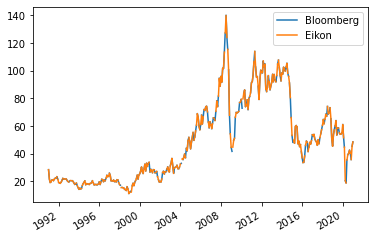

In [168]:
# Additional Visual Check
WTI_Data_Comparison = [data["WTI_Crude_Oil"], data_refinitiv["CLc1"]]
headers = ["Bloomberg", "Eikon"]
WTI_Data_Comparison = pd.concat(WTI_Data_Comparison, axis=1, keys=headers)
WTI_Data_Comparison.plot()

In [28]:
# Creating smaller datasets and a table to get the average of the five most common macroeconomic variables

sample_1=data[1:121] # 1991_2000 
sample_2=data[121:241] # 2001_2010
sample_3=data[241:361] # 2011_2020
sample_4=data[0:361] # 1991_2000
def nans(shape, dtype=float):
    a = np.empty(shape, dtype)
    a.fill(np.nan)
    return a

subsample_list=['Statistic','1991-2000','2001-2010','2011-2020','1991-2020']
table_empty = nans([6,5])

desc_stat_table = pd.DataFrame(table_empty,columns=subsample_list)

desc_stat_table.iloc[0, 0]= 'Standard Deviation of US Industrial Production'
desc_stat_table.iloc[1, 0]= 'Standard Deviation of US Initial Jobless Claims'
desc_stat_table.iloc[2, 0]= 'Standard Deviation of ISM Manufacturing Index'
desc_stat_table.iloc[3, 0]= 'Mean of US Consumer Price Index'
desc_stat_table.iloc[4, 0]= 'Mean of US Government Debt (in USD billions)'
desc_stat_table.iloc[5, 0]= 'Mean of US 10 Year Treasury Rate'

samples = [sample_1,sample_2,sample_3,sample_4]
a=1

for b in samples:
    desc_stat_table.iloc[0, a] = round(np.std(b['US_Industrial_Production_YoY%_Change']),3)
    desc_stat_table.iloc[1, a] = round(np.std(b['US_Initial_Jobless_Claims_in_thousands']),3)
    desc_stat_table.iloc[2, a] = round(np.std(b['ISM_Manufacturing_PMI_SA']),3)
    desc_stat_table.iloc[3, a] = round(np.average(b['US_Consumer_Prices_2010_=_100_Not_Seasonally_adjusted']),3)
    desc_stat_table.iloc[4, a] = round(np.average(b['Government_Debt_USD,_Billions']),3)
    desc_stat_table.iloc[5, a] = round(np.average(b['10-Yr_gov._Bond']),3)
    a=a+1
    print(a)

desc_stat_table

2
3
4
5


,Statistic,1991-2000,2001-2010,2011-2020,1991-2020
0,Standard Deviation of US Industrial Production,2.457,5.136,3.613,4.257
1,Standard Deviation of US Initial Jobless Claims,49.187,84.112,618.470,362.107
2,Standard Deviation of ISM Manufacturing Index,4.194,5.809,3.695,4.783
3,Mean of US Consumer Price Index,70.653,90.886,110.612,90.636
4,Mean of US Government Debt (in USD billions),4891.919,8566.571,19232.195,10876.031
5,Mean of US 10 Year Treasury Rate,6.384,4.130,2.133,4.226


In [369]:
# Export to Excel
desc_stat_table.to_excel('Descriptive_Stats_Macroeconomic_Variables.xlsx')

In [17]:
# Export descriptive statitics of monthly returns for assets to Excel
assets_mom.describe().loc[["mean", "std", "min", "max"]].T.to_excel('Descriptive_Stats_Assets.xlsx')

In [13]:
# Normality Test 1: Creating a Loop to generate a Histogram for the 7 Commodities
assets_hist=pd.DataFrame(assets_mom)
for col in assets_hist.iteritems(): 
    print('histogram'+col[0])
    fig, ax = plt.subplots()
    indicator=assets_hist[col[0]]
    ax.hist(indicator, alpha=0.9, color='blue',bins=20)
    plt.title(col[0])
    plt.savefig('Charts\Hist_'+col[0]+'.png')
    plt.close()

histogramWTI_Crude_Oil_MOM
histogramNatural_Gas_MOM
histogramSoybean_MOM
histogramCorn_MOM
histogramCopper_MOM
histogramGold_MOM
histogramSilver_MOM


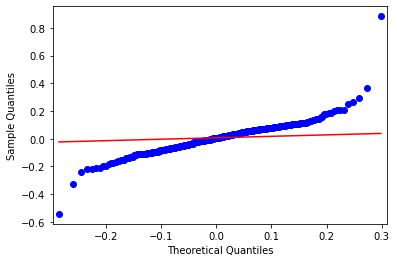

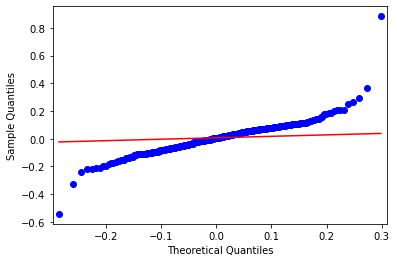

In [30]:
# Normality Test 2: Q-Q Plot as an additional Normality Test for WTI Crude Oil due to leptokurtic curve

wti=assets_mom['WTI_Crude_Oil_MOM']
mean1=statistics.mean(wti) 
st_dev1=statistics.stdev(wti)
obs_count1=len(wti)
sm.qqplot(wti, loc = mean1, scale = st_dev1, line='s')


In [31]:
# # Normality Test 3: Shapiro-Wilk Test for WTI Crude Oil due to leptokurtic curve

stat,p=sp.stats.shapiro(wti)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
1.0654257813854815e-15
Sample does not look Gaussian (reject H0)


In [12]:
# The null hypothesis is rejected and there is evidence that the data tested are not normally distributed.

In [32]:
# Divide data into further subsets for OLS Modell
data_training = data[:301]             # All data for Initial (training / in-sample) Period: 1991 – 2015 
assets_training = assets[:301]        # Assets for Initial (training / in-sample) Period: 1991 – 2015 
variables_training = variables[:301]  # Variables for Initial (training / in-sample) Period: 1991 – 2015 

data_testing = data[301:]          # All data for Testing (out of-sample) period Period: 2016 – 2020
assets_testing = assets[301:]        # Assets for Testing (out of-sample) period Period: 2016 – 2020 
variables_testing = variables[301:]  # Variables for Testing (out of-sample) period Period: 2016 – 2020

In [33]:
def OLS(y,x):

    #if const is not None: x['const']=1
        
    #Beta estimates [(X'X)^-1]X'Y
    x_xt= np.dot(x.T,x)         # multiply vector X with transposed vector X'
    x_x_inv=np.linalg.inv(x_xt)      # invert the matrix

    x_y= np.dot(x.T,y)                 # multiply transposed vector X' with Y
    est_betas= np.dot(x_x_inv,x_y)  # multiply (X'X)^-1 with X'Y
    est_Y=      np.dot(est_betas,x.T)  # multiply est_betas with X'
        
    nb_obs=x.shape[0]  
    rank=x.shape[1] #equals p = number of regressors 
    deg_freedom_residual=nb_obs-rank
    
    #Y estimate
    est_y = np.dot(x,est_betas)
    est_resid = y-est_y
    
    est_resid_2 = np.dot(est_resid.T,est_resid)
    
    est_sigma_2= est_resid_2 / nb_obs
    
    est_var_covar_beta = np.dot(x_x_inv,est_sigma_2)  #Variance-Covariance Matrix of Betas
        #var_beta_est = np.kron(x_x_inv,est_sigma_2) #???
    
    est_var_beta = np.diag(est_var_covar_beta)
    est_sd_beta=np.sqrt(est_var_beta)    # standard errors of beta
    t_stats= est_betas/est_sd_beta       # t-stats
    pvals = stats.t.sf(np.abs(t_stats), nb_obs-1)*2
  
    SST=np.var(y)*nb_obs
    SSR=est_resid_2
    R_2= 1-(SSR/SST)
    
    llf = (-0.5*nb_obs * np.log(2 * np.pi*est_sigma_2)) -(0.5*nb_obs*(1/np.log(est_sigma_2))*est_resid_2)
    
    OLS_results = {
        'Y': y,
        'est_Y': est_Y,
        'X': x,
        'est_betas': est_betas,
        'est_resid': est_resid,
        'nb_obs': nb_obs,
        'deg_freedom_residual': deg_freedom_residual,
        'est_sigma_2': est_sigma_2,
        'est_var_covar_beta': est_var_covar_beta,
        't_stats': t_stats,
        'pvals': pvals,
        'llf': llf,
        'nb_parms': rank,
        'R_2': R_2
    }
                                                          
    return OLS_results

In [34]:
# OLS Loop: Run the syntax repeatedly to generate new OLS results for each asset with 5 different variable combinations

coeff_vect =[[]]                            # prepare result vectors for coefficients
rsquare_vect = [[]]                         # prepare result vectors for rsquare
coeff_vect.clear()                          # clear
rsquare_vect.clear()                        # clear

# Iterate over all assets
for column in assets_training:
    Y = assets_training[column];              # extract column
    X = variables_training.sample(n=5,axis='columns')  # randomly selects a 5 columns of variables 
    X = sm.add_constant(X);                   # Add a column of ones to an array.
    model = sm.OLS(Y,X, missing = 'drop');    # create model
    results = model.fit();                    # run LS alrogithm to fit model to data
    #print(results.summary());                # skipping the full OLS results (see clean overview below)
    coeff_vect.append(results.params)         # save coefficients.
    rsquare_vect.append(results.rsquared)     # save rsquare
    

# Print the OLS results in a clean overview, displaying solely the RSquare & Coefficients of each model
for i in range(0,len(rsquare_vect)):
    print("[ ===== RSquare of " + list(assets_training)[i] + " ===== ]" )
    print(rsquare_vect[i])
    print("[ == Coefficients of " + list(assets_training)[i] + " === ]" )
    print(coeff_vect[i])
    print()

[ ===== RSquare of WTI_Crude_Oil ===== ]
0.6905840900709586
[ == Coefficients of WTI_Crude_Oil === ]
const                                    -88.753676
US_Initial_Jobless_Claims_in_thousands     0.071347
US_Budget_Balance_Annualized_$Bln         -0.014685
ISM_Manufacturing_PMI_SA                   0.783344
3m_Interest_Rate_%                         3.903259
Government_Debt_USD,_Billions              0.005897
dtype: float64

[ ===== RSquare of Natural_Gas ===== ]
0.32731113563753333
[ == Coefficients of Natural_Gas === ]
const                                   2.963506
US_Budget_Balance_Annualized_$Bln      -0.004332
Government_Debt_USD,_Billions          -0.001105
US_Industrial_Production_YoY%_Change   -0.084122
S&P_500_TR_Index                        0.005201
US_Budget_Balance_as_%_of_GDP          -0.117755
dtype: float64

[ ===== RSquare of Soybean ===== ]
0.7090361268942802
[ == Coefficients of Soybean === ]
const                                                   -332.457564
US_Ind

In [35]:
# Full OLS results for the model with the highest R2 value

Y = assets_training['Gold']
X = variables_training[['US_Employees_on_Nonfarm_Payrolls_Total_MoM',
                        'US_Industrial_Production_YoY%_Change',
                        'ISM_Manufacturing_PMI_SA',
                        'Money_Suppply_M2_USD,_Billions',
                        'US_Consumer_Prices_2010_=_100_Not_Seasonally_adjusted']]
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Gold   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1005.
Date:                Sun, 30 May 2021   Prob (F-statistic):          6.54e-183
Time:                        17:47:50   Log-Likelihood:                -1830.6
No. Observations:                 301   AIC:                             3673.
Df Residuals:                     295   BIC:                             3695.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                  2576.9308    147.526     17.468      0.000    2286.595    2867.267
US_Employees_on_Nonfarm_Payrolls_Total_MoM               -0.0468      0.002    -29.970      0.000      -0.050      -0.044
US_Industrial_Production_YoY%_Change                     21.7027      2.014     10.777      0.000      17.740      25.666
ISM_Manufacturing_PMI_SA                                -13.2376      1.703     -7.774      0.000     -16.589      -9.886
Money_Suppply_M2_USD,_Billions                           -0.0127      0.012     -1.077      0.282      -0.036       0.010
US_Consumer_Prices_2010_=_100_Not_Seasonally_adjusted    56.1266      2.686     20.897      0.000      50.841      61.413
==============================================================================
Omnibus:                       17.068   Durbin-Watson:                   0.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.786
Skew:                           0.502   Prob(JB):                     5.05e-05
Kurtosis:                       3.755   Cond. No.                     3.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# Obtaining and plotting the predicted price for the Training Period
regression1 = pd.DataFrame(Y)
prediction1 = results.predict()

regression1['Prediction']=prediction1
regression1.head()


,Gold,Prediction
Dates,,
1990-12-31,396.2,306.371744
1991-01-31,365.8,355.109438
1991-02-28,369.0,336.570699
1991-03-29,357.1,310.167458
1991-04-30,357.7,305.055670


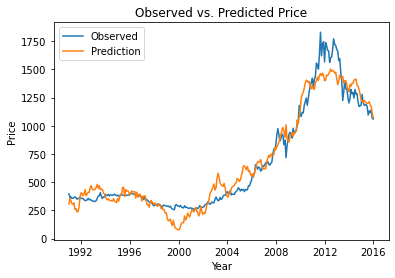

In [37]:
plt.plot(regression1)
labels=['Observed','Prediction']
plt.legend(labels)
plt.title('Observed vs. Predicted Price')
plt.show
plt.ylabel('Price')
plt.xlabel('Year')
plt.savefig('Charts\Prediction_Training.png')

In [38]:
# Calculcating the predicted price for the Testing Period with the estimated coefficients from the Training Period

Y_testing = assets_testing['Gold']
X_testing = variables_testing [['US_Employees_on_Nonfarm_Payrolls_Total_MoM',
                        'US_Industrial_Production_YoY%_Change',
                        'ISM_Manufacturing_PMI_SA',
                        'Money_Suppply_M2_USD,_Billions',
                        'US_Consumer_Prices_2010_=_100_Not_Seasonally_adjusted']]
X_testing = sm.add_constant(X_testing)  # Generate a DF with the variables including a constant for the Testing Period

In [39]:
regression2 = pd.DataFrame(Y_testing)  # Y values for Gold 2016- 020
prediction2 = results.predict(X_testing) # Predicting the Y values for Testing Period with Model Fit of Training Period
regression2['Prediction']=prediction2
regression2.head()                    # Regression 2 of predicted price exported to SQL


,Gold,Prediction
Dates,,
2016-01-29,1116.4,1118.020470
2016-02-29,1234.4,1085.340212
2016-03-31,1234.2,1060.118277
2016-04-29,1290.5,1099.308806
2016-05-31,1214.8,1128.942062


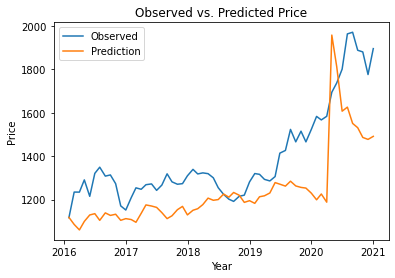

In [40]:
plt.plot(regression2)
labels=['Observed','Prediction']
plt.legend(labels)
plt.title('Observed vs. Predicted Price')
plt.ylabel('Price')
plt.xlabel('Year')
plt.show
plt.savefig('Charts\Prediction_Testing.png')

<function matplotlib.pyplot.show(close=None, block=None)>

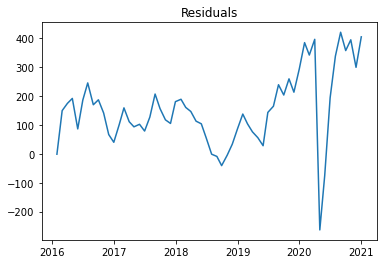

In [41]:
# Checking for Heteroskedacity: Take the Residuals of Y observed minus Y predicted
residuals1 = Y_testing - prediction2
plt.plot(residuals1)
plt.title('Residuals')
plt.show

In [42]:
# Normality Test: Jarque-Bera Test
# P-Value > 0.05, we don't reject the Null-Hypothesis, the sample is normally distributed

xs_with_constant = sm.add_constant(X)

name = ['Jarque-Bera', 'JB P-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residuals1)
lzip(name, test)

[('Jarque-Bera', 2.0062918647290493),
 ('JB P-value', 0.3667239358549964),
 ('Skew', -0.055851872261118686),
 ('Kurtosis', 3.88884139156057)]

In [43]:
# Breusch-Pagan Test for Heteroskedasticity:
# P-Value < 0.05, we reject the Null-Hypothesis, no conditional Heteroskedasticity exists )

name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test = sms.het_breuschpagan(residuals1, X_testing)
lzip(name, test)

[('Lagrange multiplier statistic', 42.945264266079505),
 ('p-value', 3.790678709613012e-08),
 ('f-value', 27.1953116899478),
 ('f p-value', 1.2414527522394732e-13)]

In [44]:
# Autocorrelation: JB Test for Normal Distribution of Residuals
# Test Statistic is close to 0 and therefore a positive serial correlation may exist

dw_pvalue1=sm.stats.stattools.durbin_watson(residuals1)
print("\n","Durbin Watson Test Statistics", dw_pvalue1)


 Durbin Watson Test Statistics 0.3193097334739397


In [45]:
# Multicollinearity
corr = data_training [['Gold',
                  'US_Employees_on_Nonfarm_Payrolls_Total_MoM',
                  'US_Industrial_Production_YoY%_Change',
                  'ISM_Manufacturing_PMI_SA',
                  'Money_Suppply_M2_USD,_Billions',
                   'US_Consumer_Prices_2010_=_100_Not_Seasonally_adjusted']].corr()
corr

,Gold,US_Employees_on_Nonfarm_Payrolls_Total_MoM,US_Industrial_Production_YoY%_Change,ISM_Manufacturing_PMI_SA,"Money_Suppply_M2_USD,_Billions",US_Consumer_Prices_2010_=_100_Not_Seasonally_adjusted
Gold,1.000000,0.510257,-0.129613,0.121693,0.874148,0.844764
US_Employees_on_Nonfarm_Payrolls_Total_MoM,0.510257,1.000000,-0.195284,0.041605,0.788064,0.870328
US_Industrial_Production_YoY%_Change,-0.129613,-0.195284,1.000000,0.579823,-0.257984,-0.249097
ISM_Manufacturing_PMI_SA,0.121693,0.041605,0.579823,1.000000,0.098106,0.105982
"Money_Suppply_M2_USD,_Billions",0.874148,0.788064,-0.257984,0.098106,1.000000,0.973136
US_Consumer_Prices_2010_=_100_Not_Seasonally_adjusted,0.844764,0.870328,-0.249097,0.105982,0.973136,1.000000


<AxesSubplot:>

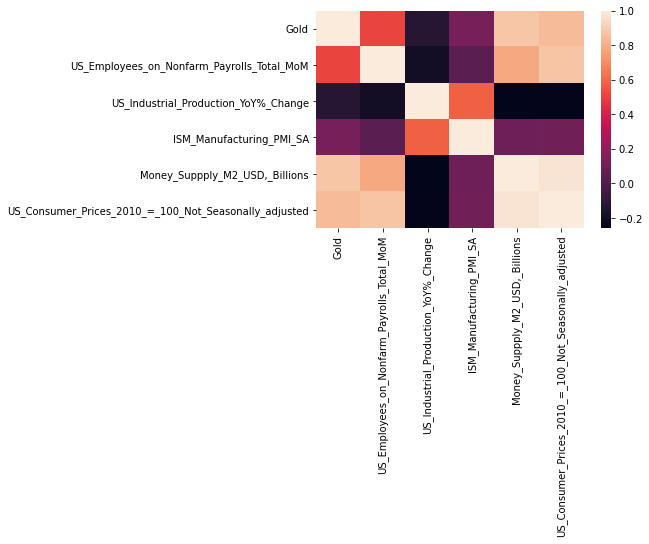

In [46]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [47]:
#Code for VIF Calculation 
# Adjusted for Endogenity
# Writing a function to calculate the VIF values

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(formula="y~x", data=x_vars,endog=y, exog=x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [48]:
#Calculating VIF values using that function
vif_cal(input_data = data_training[['Gold',
                                    'US_Employees_on_Nonfarm_Payrolls_Total_MoM',
                                    'US_Industrial_Production_YoY%_Change',
                                    'ISM_Manufacturing_PMI_SA',
                                    'Money_Suppply_M2_USD,_Billions',
                                    'US_Consumer_Prices_2010_=_100_Not_Seasonally_adjusted']], 
                                    dependent_col='Gold')

US_Employees_on_Nonfarm_Payrolls_Total_MoM  VIF =  710.02
US_Industrial_Production_YoY%_Change  VIF =  1.96
ISM_Manufacturing_PMI_SA  VIF =  132.86
Money_Suppply_M2_USD,_Billions  VIF =  166.18
US_Consumer_Prices_2010_=_100_Not_Seasonally_adjusted  VIF =  1438.86


In [49]:
# Dicky Fuller Test for Unit Roots

var_list=['WTI_Crude_Oil', 'Natural_Gas', 'Soybean', 'Corn', 'Copper', 'Gold', 'Silver']

for i in var_list:
    for lags in range(1,3):
        print('Number of lags used:',lags)

        adf_library = adfuller(assets_training[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(assets_training[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,'in Level','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library[1],'\n')

        print(i,'in 1st Difference','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library_d[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library_d[1],'\n')
    print('____________________________________________','\n')

Number of lags used: 1
WTI_Crude_Oil in Level 
 ADF Stat (Library) for WTI_Crude_Oil : -0.91 
 ADF P-Val (Library) WTI_Crude_Oil : 0.32 

WTI_Crude_Oil in 1st Difference 
 ADF Stat (Library) for WTI_Crude_Oil : -9.93 
 ADF P-Val (Library) WTI_Crude_Oil : 0.00 

Number of lags used: 2
WTI_Crude_Oil in Level 
 ADF Stat (Library) for WTI_Crude_Oil : -0.98 
 ADF P-Val (Library) WTI_Crude_Oil : 0.30 

WTI_Crude_Oil in 1st Difference 
 ADF Stat (Library) for WTI_Crude_Oil : -8.64 
 ADF P-Val (Library) WTI_Crude_Oil : 0.00 

____________________________________________ 

Number of lags used: 1
Natural_Gas in Level 
 ADF Stat (Library) for Natural_Gas : -1.45 
 ADF P-Val (Library) Natural_Gas : 0.14 

Natural_Gas in 1st Difference 
 ADF Stat (Library) for Natural_Gas : -14.37 
 ADF P-Val (Library) Natural_Gas : 0.00 

Number of lags used: 2
Natural_Gas in Level 
 ADF Stat (Library) for Natural_Gas : -1.24 
 ADF P-Val (Library) Natural_Gas : 0.20 

Natural_Gas in 1st Difference 
 ADF Stat (Libr

In [50]:
# Rolling Regression for Training Period

def rolling_regression(y, x, window=60):
    """ 
    y and x must be pandas.Series
    """
# === Clean-up ============================================================
    x = x.dropna()
    y = y.dropna()
# === Trim acc to shortest ================================================
    if x.index.size > y.index.size:
        x = x[y.index]
    else:
        y = y[x.index]
# === Verify enough space =================================================
    if x.index.size < window:
        return None
    else:
    # === Add a constant if needed ========================================
        #X = x.to_frame()
        #X['c'] = 1
    # === Loop... this can be improved ====================================
        estimate_data = []
        for i in range(window, x.index.size+1):
            X_slice = X.values[i-window:i,:] # always index in np as opposed to pandas, much faster
            y_slice = y.values[i-window:i]
            coeff = np.dot(np.dot(np.linalg.inv(np.dot(X_slice.T, X_slice)), X_slice.T), y_slice)
            estimate_data.append(coeff[0] * x.values[window-1] + coeff[1])
    # === Assemble ========================================================
        estimate = pd.Series(data=estimate_data, index=x.index[window-1:]) 
        return estimate            

In [52]:
variables1=pd.DataFrame(data_training[['Gold',
                                       'US_Employees_on_Nonfarm_Payrolls_Total_MoM',
                                       'US_Industrial_Production_YoY%_Change',
                                       'ISM_Manufacturing_PMI_SA',
                                       'Money_Suppply_M2_USD,_Billions',
                                       'US_Consumer_Prices_2010_=_100_Not_Seasonally_adjusted']])
variables1['const']=1
X= variables1[['US_Employees_on_Nonfarm_Payrolls_Total_MoM',
               'US_Industrial_Production_YoY%_Change',
               'ISM_Manufacturing_PMI_SA',
               'Money_Suppply_M2_USD,_Billions',
               'US_Consumer_Prices_2010_=_100_Not_Seasonally_adjusted',
              'const']]
Y= variables1['Gold']

In [53]:
variables1

,Gold,US_Employees_on_Nonfarm_Payrolls_Total_MoM,US_Industrial_Production_YoY%_Change,ISM_Manufacturing_PMI_SA,"Money_Suppply_M2_USD,_Billions",US_Consumer_Prices_2010_=_100_Not_Seasonally_adjusted,const
Dates,,,,,,,
1990-12-31,396.2,109166,-1.05,40.8,3291.6,61.4,1
1991-01-31,365.8,109055,-0.81,39.2,3266.9,61.7,1
1991-02-28,369.0,108734,-2.48,39.4,3290.0,61.8,1
1991-03-29,357.1,108574,-3.49,40.7,3320.0,61.9,1
1991-04-30,357.7,108364,-3.16,42.8,3313.8,62.0,1
...,...,...,...,...,...,...,...
2015-08-31,1132.0,142126,-1.27,50.0,12077.4,109.3,1
2015-09-30,1115.5,142281,-1.93,50.0,12075.1,109.1,1
2015-10-30,1141.4,142587,-2.30,49.0,12134.0,109.1,1


In [54]:
rolling_ols = rolling_regression(Y,X,50)
rolling_ols = pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values))).T
rolling_ols.columns=["Const", "Beta_1", "Beta_2", "Beta_3", "Beta_4", "Beta_5"]
rolling_ols.head()

,Const,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5
1995-01-31,1002.076772,-5.201276,-4.763153,24.617091,-4.663718,-5.250821
1995-02-28,725.937534,-6.630229,-6.311593,15.055913,-6.239276,-6.666261
1995-03-31,611.685149,-7.461009,-7.191707,10.867523,-7.130586,-7.491463
1995-04-28,512.014155,-7.659094,-7.433059,7.724749,-7.381758,-7.684655
1995-05-31,547.417113,-7.684072,-7.442627,8.748542,-7.387828,-7.711375


<function matplotlib.pyplot.show(close=None, block=None)>

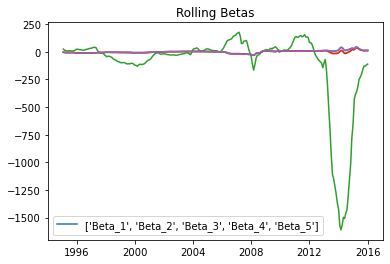

In [55]:
plt.plot(rolling_ols[["Beta_1", "Beta_2", "Beta_3", "Beta_4", "Beta_5"]])
labels= [["Beta_1", "Beta_2", "Beta_3", "Beta_4", "Beta_5"]]
plt.legend(labels)
plt.title('Rolling Betas')
plt.show

In [56]:
# Overfitting: 

# Applying more (or even all) variables to the OLS model may lead to higher R2, but to poor T-stats / P-Values

Y = assets_testing['Gold']
X = variables_testing
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Gold   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     112.7
Date:                Sun, 30 May 2021   Prob (F-statistic):           2.44e-30
Time:                        17:48:27   Log-Likelihood:                -303.46
No. Observations:                  60   AIC:                             634.9
Df Residuals:                      46   BIC:                             664.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                 -2016.7086   1549.530     -1.301      0.200   -5135.751    1102.334
US_Industrial_Production_YoY%_Change                     -2.0281      7.917     -0.256      0.799     -17.963      13.907
US_Initial_Jobless_Claims_in_thousands                   -0.0260      0.018     -1.457      0.152      -0.062       0.010
US_Employees_on_Nonfarm_Payrolls_Total_MoM               -0.0038      0.007     -0.524      0.603      -0.018       0.011
ISM_Manufacturing_PMI_SA                                  4.0123      4.699      0.854      0.398      -5.446      13.470
US_Consumer_Prices_2010_=_100_Not_Seasonally_adjusted    22.7546     14.816      1.536      0.131      -7.068      52.577
US_Budget_Balance_Annualized_$Bln                         0.0849      0.153      0.557      0.580      -0.222       0.392
US_Budget_Balance_as_%_of_GDP                            -7.4641     20.798     -0.359      0.721     -49.328      34.400
Government_Debt_USD,_Billions                             0.0306      0.034      0.903      0.371      -0.038       0.099
Money_Suppply_M2_USD,_Billions                            0.0147      0.049      0.298      0.767      -0.084       0.114
3m_Interest_Rate_%                                      -27.7714     37.317     -0.744      0.461    -102.886      47.344
10-Yr_gov._Bond                                        -155.5306     39.416     -3.946      0.000    -234.870     -76.191
S&P_500_TR_Index                                         -0.0030      0.039     -0.076      0.940      -0.082       0.076
EUR_USD                                                 601.3931    212.813      2.826      0.007     173.023    1029.764
==============================================================================
Omnibus:                        2.113   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                1.319
Skew:                          -0.292   Prob(JB):                        0.517
Kurtosis:                       3.433   Cond. No.                     4.13e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
# Export relevant tables to SQL

import sqlite3 as sql

def create_connection(db_file):
    conn = None
    try:
        conn = sql.connect(db_file)
        print(sql.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()

In [61]:
# Create Table in using SQL and Python to upload clean Data
conn = sql.connect('Commodities_v4.db')
data.to_sql('Commodities_Clean_Data', conn)

ValueError: Table 'Commodities_Clean_Data' already exists.

In [62]:
conn = sql.connect('Commodities_v4.db')
c = conn.cursor()


c.execute("CREATE INDEX Dates ON Commodities_Clean_Data(Dates)")
conn.commit()

In [63]:
# Create Table in using SQL and Python to upload the descriptive statistics >> average of the five most common macroeconomic variables
conn = sql.connect('Commodities_v4.db')
desc_stat_table.to_sql('Descriptive_Statistics', conn)

In [64]:
# Create Table in using SQL and Python to upload the predicted price for the Training Period
conn = sql.connect('Commodities_v4.db')
regression1.to_sql('Regression_1990_2015', conn)

In [66]:
#Create Table in using SQL and Python to upload the predicted price for the Testing Period
conn = sql.connect('Commodities_v4.db')
regression2.to_sql('Regression_2016_2020', conn)

ValueError: Table 'Regression_2016_2020' already exists.

In [67]:
# Create Table in using SQL and Python to upload the correlation of Gold and the 5 variables
conn = sql.connect('Commodities_v4.db')
corr.to_sql('Correlation_Gold', conn)

In [68]:
# Create Table in using SQL and Python to upload Rolling OLS
conn = sql.connect('Commodities_v4.db')
rolling_ols.to_sql('Rolling_Ols', conn)

In [69]:
# Create Table in using SQL and Python for the Upload of the OLS Results of Gold
conn = sql.connect('Commodities_v4.db')
conn.execute('''CREATE TABLE OLS_Results_Gold
         (ID INT PRIMARY KEY     NOT NULL,
         RSquare_of_Gold                                                       INT     NOT NULL,
         Const                                                                 INT     NOT NULL,
         Coef_US_Employees_on_Nonfarm_Payrolls_Total_MoM                       INT     NOT NULL,
         Coef_US_Industrial_Production_YoY_Change                              INT     NOT NULL,
         Coef_ISM_Manufacturing_PMI_SA                                         INT     NOT NULL,
         Coef_Money_Suppply_M2_USD_Billions                                    INT     NOT NULL,
         Coef_US_Consumer_Prices_2010_100_Not_Seasonally_adjusted              INT     NOT NULL);''')

print("Table created successfully")

Table created successfully


In [70]:
# Insert information into the table using SQL and Python  - rounded Values
conn = sql.connect('Commodities_v4.db')

conn.execute("INSERT INTO OLS_Results_Gold(ID,RSquare_of_Gold,Const,Coef_US_Employees_on_Nonfarm_Payrolls_Total_MoM,Coef_US_Industrial_Production_YoY_Change,Coef_ISM_Manufacturing_PMI_SA,Coef_Money_Suppply_M2_USD_Billions,Coef_US_Consumer_Prices_2010_100_Not_Seasonally_adjusted) VALUES (1, 0.945, 2576.93, -0.047, 21.703, -13.238, -0.013, 56.123)");
conn.commit()